# Problem 1: Linear Regression



 You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

# Importing the  Libaries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

# Importing the csv file.

In [48]:
data_df=pd.read_csv('cubic_zirconia.csv')

# Basic EDA

In [49]:
data_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [50]:
# REmove the unammed 0 columns as its of no use.

In [51]:
data_df1=data_df.drop('Unnamed: 0',axis=1)
data_df1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [52]:
data_df1.shape

(26967, 10)

In [53]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [54]:
# Since there are 3 items in object data type. we need to convert them into integer datatype.


In [55]:
data_df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


# Finding the  unique values for categorical variables

In [56]:
for column in data_df1.columns:
    if data_df1[column].dtype == 'object':
        print(column.upper(),': ',data_df1[column].nunique())
        print(data_df1[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




# Missing values 

In [57]:
data_df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

# Imputing missing values

In [58]:
for column in data_df1.columns:
    if data_df1[column].dtype == 'float64':
        median = data_df1[column].median()
        data_df1[column] = data_df1[column].fillna(median)    
        
data_df1.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Checking for duplicates 

In [59]:
dups = data_df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 34


In [60]:
print('Before',data_df1.shape)
data_df1.drop_duplicates(inplace=True) 
print('After',data_df1.shape)

Before (26967, 10)
After (26933, 10)


In [61]:
dups = data_df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [62]:
data_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


# Univariate Analysis of Continuous and Categorical variables

# Checking the spread of the data using boxplot for the continuous variables.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


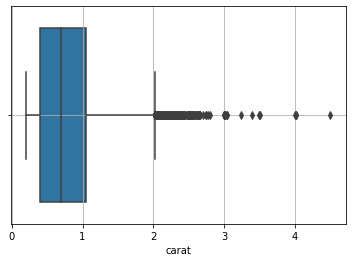

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


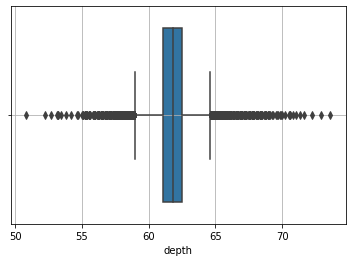

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


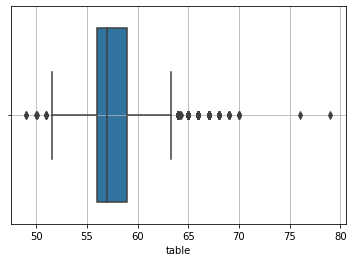

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


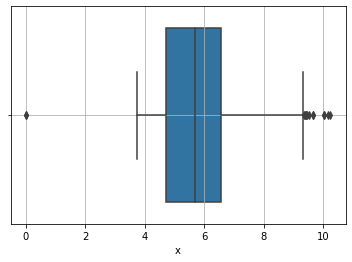

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


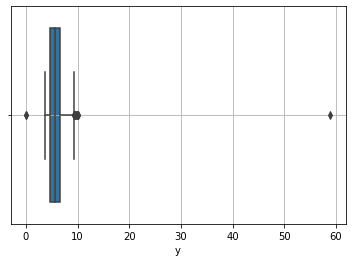

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


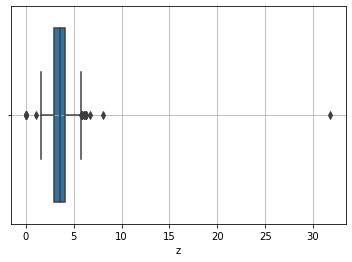

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


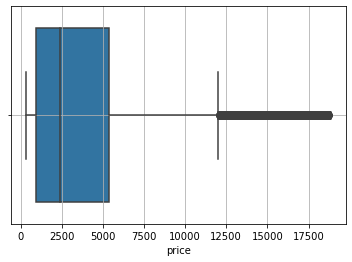

In [63]:
cont_cols = ['carat','depth','table','x','y','z','price']
for i in cont_cols:
    sns.boxplot(data_df1[i],whis=1.5)
    plt.grid()
    plt.show();

# Treating the outliers.


In [64]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [65]:
lr,ur=remove_outlier(data_df1['carat'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data_df1['carat']=np.where(data_df1['carat']>ur,ur,data_df1['carat'])
data_df1['carat']=np.where(data_df1['carat']<lr,lr,data_df1['carat'])
print('')

lr,ur=remove_outlier(data_df1['depth'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data_df1['depth']=np.where(data_df1['depth']>ur,ur,data_df1['depth'])
data_df1['depth']=np.where(data_df1['depth']<lr,lr,data_df1['depth'])
print('')

lr,ur=remove_outlier(data_df1['table'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data_df1['table']=np.where(data_df1['table']>ur,ur,data_df1['table'])
data_df1['table']=np.where(data_df1['table']<lr,lr,data_df1['table'])
print('')

lr,ur=remove_outlier(data_df1['x'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data_df1['x']=np.where(data_df1['x']>ur,ur,data_df1['x'])
data_df1['x']=np.where(data_df1['x']<lr,lr,data_df1['x'])
print('')

lr,ur=remove_outlier(data_df1['y'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data_df1['y']=np.where(data_df1['y']>ur,ur,data_df1['y'])
data_df1['y']=np.where(data_df1['y']<lr,lr,data_df1['y'])
print('')

lr,ur=remove_outlier(data_df1['z'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data_df1['z']=np.where(data_df1['z']>ur,ur,data_df1['z'])
data_df1['z']=np.where(data_df1['z']<lr,lr,data_df1['z'])
print('')

lr,ur=remove_outlier(data_df1['price'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data_df1['price']=np.where(data_df1['price']>ur,ur,data_df1['price'])
data_df1['price']=np.where(data_df1['price']<lr,lr,data_df1['price'])
print('')


Lower Range : -0.5750000000000001 
Upper Range : 2.0250000000000004

Lower Range : 59.0 
Upper Range : 64.6

Lower Range : 51.5 
Upper Range : 63.5

Lower Range : 1.9500000000000002 
Upper Range : 9.309999999999999

Lower Range : 1.9649999999999999 
Upper Range : 9.285

Lower Range : 1.1899999999999997 
Upper Range : 5.75

Lower Range : -5671.5 
Upper Range : 11972.5



C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


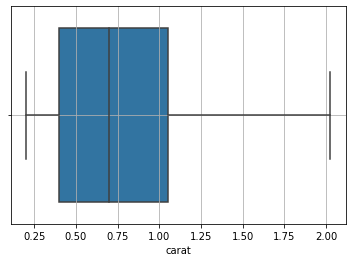

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


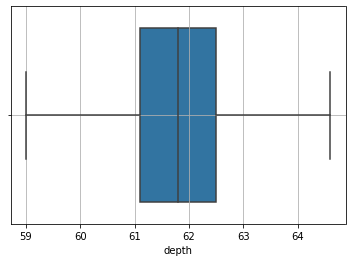

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


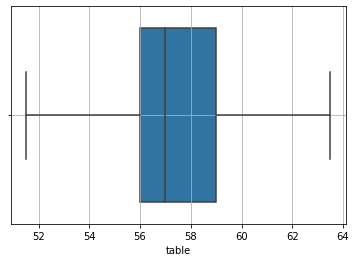

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


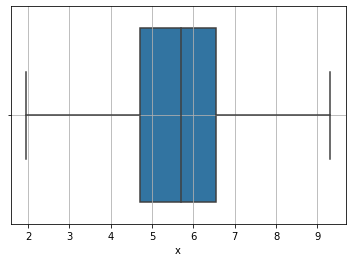

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


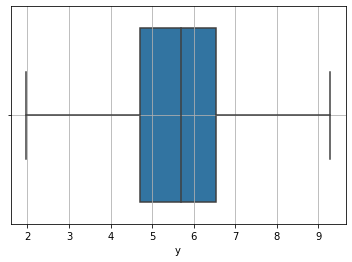

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


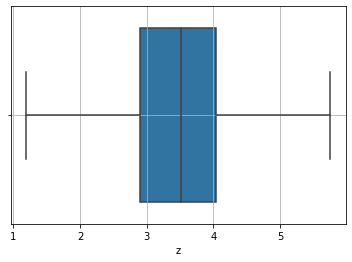

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


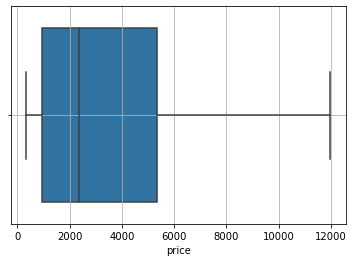

In [66]:
cont_cols = ['carat','depth','table','x','y','z','price']
for i in cont_cols:
    sns.boxplot(data_df1[i],whis=1.5)
    plt.grid()
    plt.show();

# Checking the spread of the data using countplot for the categorical variables.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


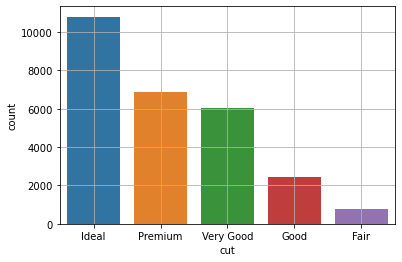

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


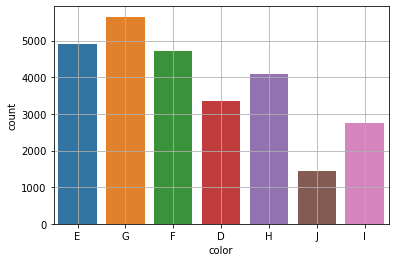

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


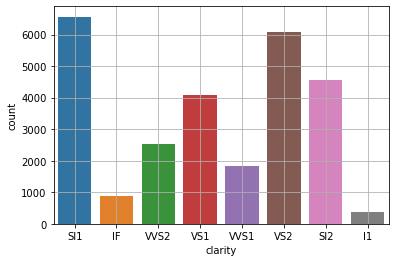

In [67]:
cols = ['cut','color','clarity']
for i in cols:
    sns.countplot(data_df1[i])
    plt.grid()
    plt.show();

# Bivariate Analysis

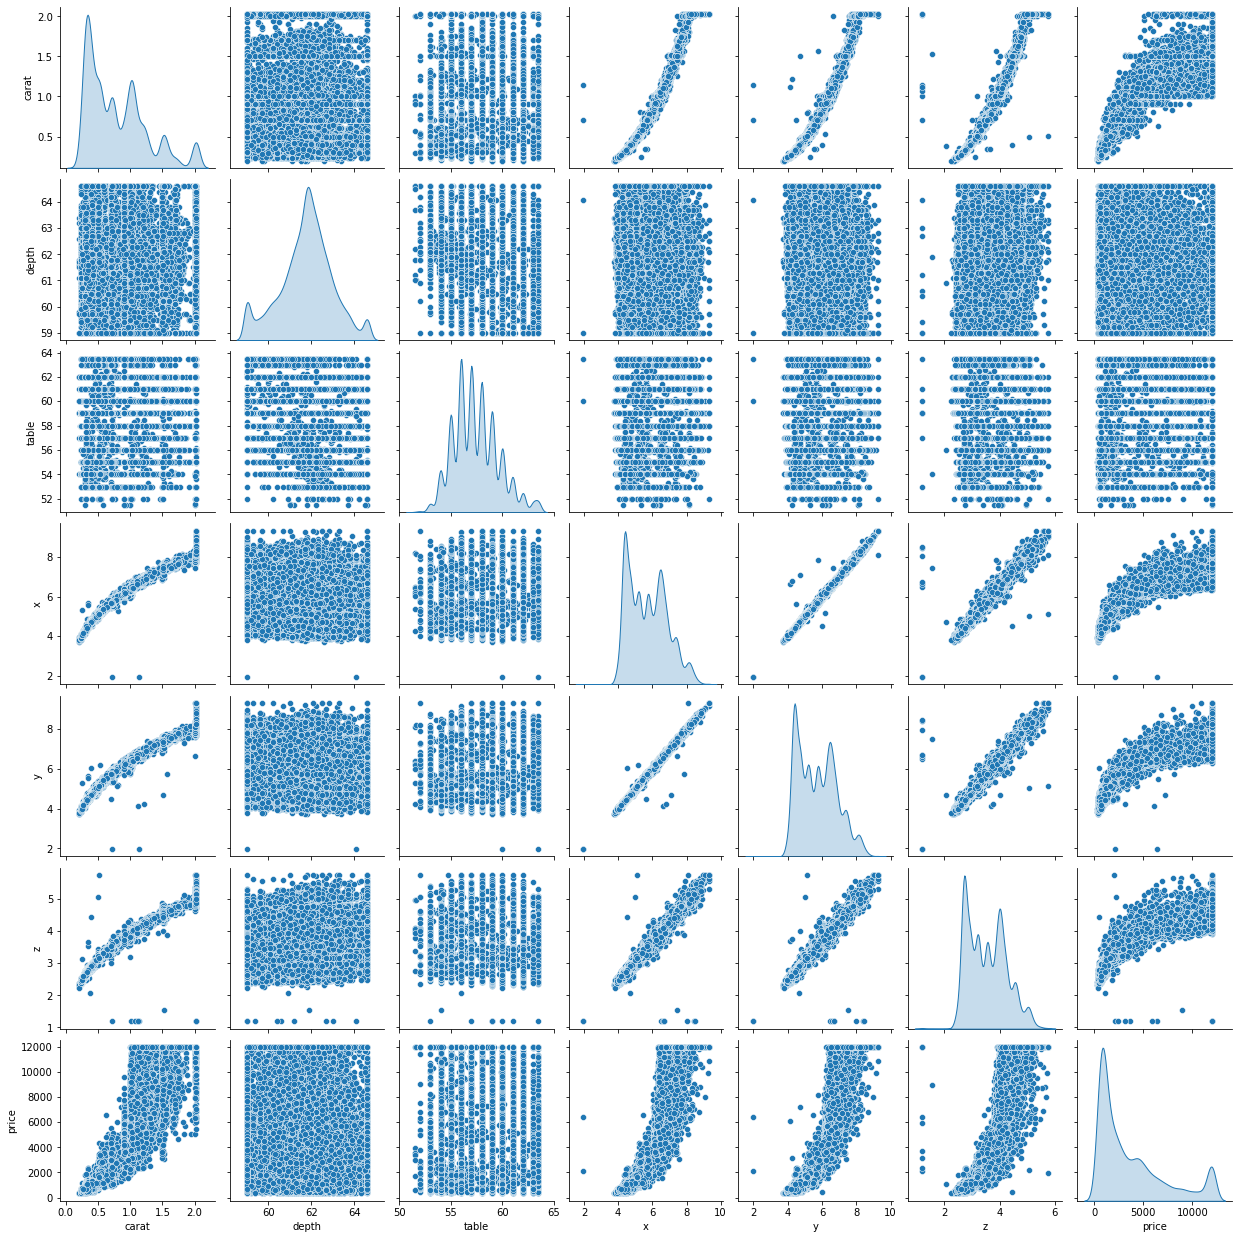

In [68]:
data_df1b = (data_df1[cont_cols])
sns.pairplot(data_df1b, diag_kind='kde')  
plt.show()

# Checking for Correlations.

In [69]:
data_df1.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029433,0.187143,0.982387,0.981464,0.977508,0.936762
depth,0.029433,1.000000,-0.289357,-0.019848,-0.022884,0.095253,-0.001060
table,0.187143,-0.289357,1.000000,0.199061,0.193428,0.159380,0.137880
x,0.982387,-0.019848,0.199061,1.000000,0.998491,0.988168,0.912933
y,0.981464,-0.022884,0.193428,0.998491,1.000000,0.987841,0.914361
z,0.977508,0.095253,0.159380,0.988168,0.987841,1.000000,0.905866
price,0.936762,-0.001060,0.137880,0.912933,0.914361,0.905866,1.000000


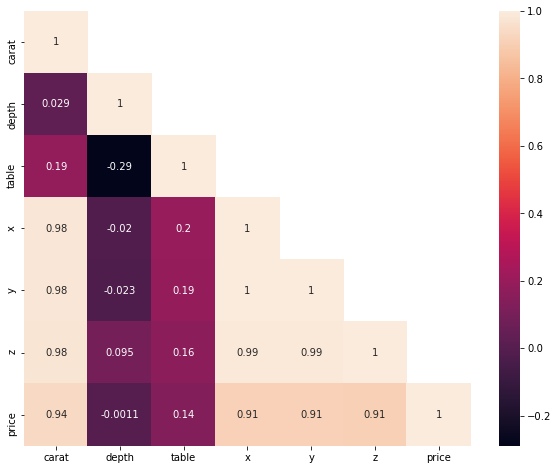

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(data_df1.corr(), annot=True,mask=np.triu(data_df1.corr(),+1));

There is high corrleation between carat and x,y,z,price and price with x,y,z and z with x and y

# Converting all objects to categorical codes

In [71]:
## We are coding up the 'cut' variable in an ordinal manner
data_df1['cut']=np.where(data_df1['cut']=='Ideal','2',data_df1['cut'])
data_df1['cut']=np.where(data_df1['cut']=='Premium','2',data_df1['cut'])

data_df1['cut']=np.where(data_df1['cut']=='Good','1',data_df1['cut'])
data_df1['cut']=np.where(data_df1['cut']=='Very Good','1',data_df1['cut'])

data_df1['cut']=np.where(data_df1['cut']=='Fair','0',data_df1['cut'])

In [72]:
data_df1['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [73]:
data_df1['clarity']=np.where(data_df1['clarity']=='I1','Best',data_df1['clarity'])

data_df1['clarity']=np.where(data_df1['clarity']=='SI1','VGood',data_df1['clarity'])
data_df1['clarity']=np.where(data_df1['clarity']=='SI2','VGood',data_df1['clarity'])

data_df1['clarity']=np.where(data_df1['clarity']=='VS1','Good',data_df1['clarity'])
data_df1['clarity']=np.where(data_df1['clarity']=='VS2','Good',data_df1['clarity'])


data_df1['clarity']=np.where(data_df1['clarity']=='VVS1','Bad',data_df1['clarity'])
data_df1['clarity']=np.where(data_df1['clarity']=='VVS2','Bad',data_df1['clarity'])

data_df1['clarity']=np.where(data_df1['clarity']=='IF','Worst',data_df1['clarity'])

In [74]:
data_df1['color']=np.where(data_df1['color']=='J','Best',data_df1['color'])

data_df1['color']=np.where(data_df1['color']=='I','VGood',data_df1['color'])
data_df1['color']=np.where(data_df1['color']=='H','VGood',data_df1['color'])

data_df1['color']=np.where(data_df1['color']=='G','Good',data_df1['color'])
data_df1['color']=np.where(data_df1['color']=='F','Good',data_df1['color'])

data_df1['color']=np.where(data_df1['color']=='E','Bad',data_df1['color'])

data_df1['color']=np.where(data_df1['color']=='D','Worst',data_df1['color'])



In [75]:
data_df1.head(50)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,Bad,VGood,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,Good,Worst,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,1,Bad,Bad,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2,Good,Good,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2,Good,Bad,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,2,Worst,Good,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1,VGood,VGood,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,2,Bad,VGood,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1,VGood,VGood,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,2,Good,Good,60.5,57.0,4.52,4.60,2.76,706.0


In [76]:
data_df1['clarity']=np.where(data_df1['clarity']=='Best','4',data_df1['clarity'])

data_df1['clarity']=np.where(data_df1['clarity']=='VGood','3',data_df1['clarity'])
data_df1['clarity']=np.where(data_df1['clarity']=='VGood','3',data_df1['clarity'])

data_df1['clarity']=np.where(data_df1['clarity']=='Good','2',data_df1['clarity'])
data_df1['clarity']=np.where(data_df1['clarity']=='Good','2',data_df1['clarity'])


data_df1['clarity']=np.where(data_df1['clarity']=='Bad','1',data_df1['clarity'])
data_df1['clarity']=np.where(data_df1['clarity']=='Bad','1',data_df1['clarity'])

data_df1['clarity']=np.where(data_df1['clarity']=='Worst','0',data_df1['clarity'])

In [77]:
data_df1['color']=np.where(data_df1['color']=='Best','4',data_df1['color'])

data_df1['color']=np.where(data_df1['color']=='VGood','3',data_df1['color'])
data_df1['color']=np.where(data_df1['color']=='VGood','3',data_df1['color'])

data_df1['color']=np.where(data_df1['color']=='Good','2',data_df1['color'])
data_df1['color']=np.where(data_df1['color']=='Good','2',data_df1['color'])

data_df1['color']=np.where(data_df1['color']=='Bad','1',data_df1['color'])

data_df1['color']=np.where(data_df1['color']=='Worst','0',data_df1['color'])


In [79]:
data_df1.head(50)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,3,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,2,0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2,2,2,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2,2,1,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,2,0,2,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1,3,3,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,2,1,3,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1,3,3,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,2,2,2,60.5,57.0,4.52,4.60,2.76,706.0


In [80]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.3+ MB


In [81]:
data_df1['cut'] = data_df1['cut'].astype('int64')
data_df1['color'] = data_df1['color'].astype('int64')
data_df1['clarity'] = data_df1['clarity'].astype('int64')

In [82]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 3.3 MB


In [141]:
data_df_dummy = pd.get_dummies(data_df1, columns=['clarity'])



In [165]:
data_df_dummy.head(10)

,carat,cut,color,depth,table,x,y,z,price,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4
0,0.30,2,1,62.1,58.0,4.27,4.29,2.66,499.0,0,0,0,1,0
1,0.33,2,2,60.8,58.0,4.42,4.46,2.70,984.0,1,0,0,0,0
2,0.90,1,1,62.2,60.0,6.04,6.12,3.78,6289.0,0,1,0,0,0
3,0.42,2,2,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,1,0,0
4,0.31,2,2,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0
5,1.02,2,0,61.5,56.0,6.46,6.49,3.99,9502.0,0,0,1,0,0
6,1.01,1,3,63.7,60.0,6.35,6.30,4.03,4836.0,0,0,0,1,0
7,0.50,2,1,61.5,62.0,5.09,5.06,3.12,1415.0,0,0,0,1,0
8,1.21,1,3,63.8,63.5,6.72,6.63,4.26,5407.0,0,0,0,1,0
9,0.35,2,2,60.5,57.0,4.52,4.60,2.76,706.0,0,0,1,0,0


In [227]:
data_df_dummy.shape

(26933, 14)

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [188]:
X=data_df_dummy.drop('price',axis=1)
Y=data_df_dummy[['price']]

In [189]:
X.head()

,carat,cut,color,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4
0,0.30,2,1,62.1,58.0,4.27,4.29,2.66,0,0,0,1,0
1,0.33,2,2,60.8,58.0,4.42,4.46,2.70,1,0,0,0,0
2,0.90,1,1,62.2,60.0,6.04,6.12,3.78,0,1,0,0,0
3,0.42,2,2,61.6,56.0,4.82,4.80,2.96,0,0,1,0,0
4,0.31,2,2,60.4,59.0,4.35,4.43,2.65,0,1,0,0,0


In [190]:
Y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [191]:
# Split X and Y into 70 :30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [192]:
# Linear Regression Model

In [193]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [211]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8775.226756064918
The coefficient for cut is 191.67829619067368
The coefficient for color is -393.0300288402921
The coefficient for depth is -17.34532907596946
The coefficient for table is -25.44500804357187
The coefficient for x is -1540.001830327264
The coefficient for y is 1293.8316218547159
The coefficient for z is -215.783500988086
The coefficient for clarity_0 is 1399.0178135123015
The coefficient for clarity_1 is 1143.6970745580632
The coefficient for clarity_2 is 517.8984727775139
The coefficient for clarity_3 is -448.13636676012345
The coefficient for clarity_4 is -2612.476994087755


In [212]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1720.9060839820859


In [213]:
# R square on training data
regression_model.score(X_train, Y_train)

0.9290035850988146

 92% of the variation in the price is explained by the predictors in the model for train set

In [214]:
# R square on testing data
regression_model.score(X_test, Y_test)

0.9321174497713431

In [215]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

923.4235946201567

In [216]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

905.1227283017621

# Linear Regression using statsmodels

In [217]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)
data_train.head()

,carat,cut,color,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,price
22114,0.34,1,3,62.4,60.0,4.41,4.44,2.76,0,0,1,0,0,537.0
2275,0.30,2,1,61.2,55.0,4.35,4.31,2.65,0,0,1,0,0,844.0
19183,0.50,2,2,62.5,57.0,5.09,5.05,3.17,0,0,0,1,0,1240.0
5030,1.10,1,1,63.3,56.0,6.53,6.58,4.15,0,0,0,1,0,4065.0
25414,1.02,2,2,61.1,62.0,6.54,6.49,3.98,0,0,0,1,0,4057.0


In [218]:
data_train.columns

Index(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z', 'clarity_0',
       'clarity_1', 'clarity_2', 'clarity_3', 'clarity_4', 'price'],
      dtype='object')

In [230]:
expr= 'price ~ carat+ cut+ color +depth + table+ x+ y+ z+ clarity_0+ clarity_1 + clarity_2+ clarity_3 + clarity_4'
       

In [231]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    1434.088403
carat        8775.226756
cut           191.678296
color        -393.030029
depth         -17.345329
table         -25.445008
x           -1540.001830
y            1293.831622
z            -215.783501
clarity_0    1685.835494
clarity_1    1430.514755
clarity_2     804.716153
clarity_3    -161.318686
clarity_4   -2325.659313
dtype: float64

In [232]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.054e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:58:19   Log-Likelihood:            -1.5548e+05
No. Observations:               18853   AIC:                         3.110e+05
Df Residuals:                   18840   BIC:                         3.111e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1434.0884    575.776      2.491      0.0

In [233]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [234]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

923.4235946201555

In [235]:
np.sqrt(lm1.mse_resid) 

923.7421306234233

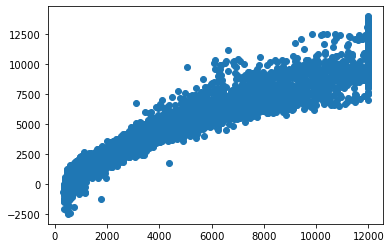

In [236]:
# Prediction on Test data
Y_pred = lm1.predict(data_test)
plt.scatter(Y_test['price'],Y_pred )
plt.show()

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [238]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [239]:
i=0
for column in X.columns:
    if i < 14:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 31.73290334397604
cut ---> 1.3043443986897023
color ---> 1.101634396999618
depth ---> 2.7659149754873216
table ---> 1.3673168565711085
x ---> 397.50939506196414
y ---> 380.9296168475269
z ---> 104.90005360007328
clarity_0 ---> 350.11612455079245
clarity_1 ---> 1718.5242430568726
clarity_2 ---> 4017.3392131299743
clarity_3 ---> 4403.732021813869
clarity_4 ---> 145.054934593609


In [240]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1434.09) * Intercept + (8775.23) * carat + (191.68) * cut + (-393.03) * color + (-17.35) * depth + (-25.45) * table + (-1540.0) * x + (1293.83) * y + (-215.78) * z + (1685.84) * clarity_0 + (1430.51) * clarity_1 + (804.72) * clarity_2 + (-161.32) * clarity_3 + (-2325.66) * clarity_4 + 

# Question 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

# Importing Necessary Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [2]:
df=pd.read_csv('Holiday_Package.csv')

# Basic EDA

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [5]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [6]:
df.shape

(872, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for Missing Values 

In [9]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

# Checking for Duplicates

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


# Geting unique counts of all Objects

In [11]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




# Univariate Analysis of Continuous and Categorical variables

# Checking the spread of the data using boxplot for the continuous variables.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


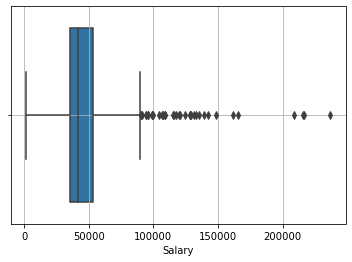

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


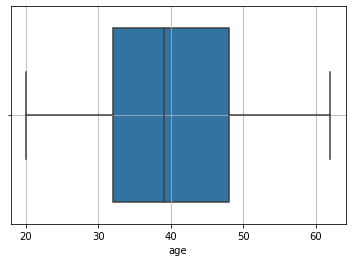

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


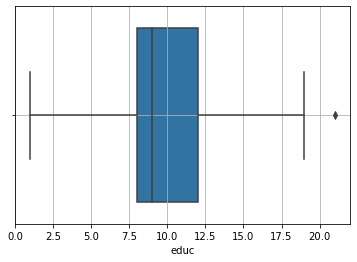

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


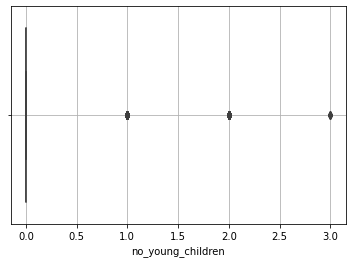

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


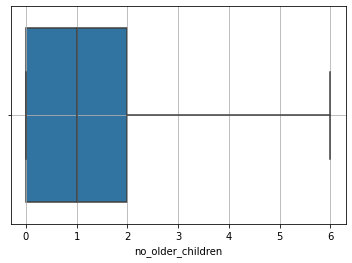

In [12]:
continous_cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in continous_cols:
    sns.boxplot(df[i],whis=2.0)
    plt.grid()
    plt.show();

In [13]:
# Since there are outliers in the continous variable will impute only salary with median and rest like no of younger children and edu is kept as the same as the no of outliers is not many.

# Treating the outliers

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
lr,ur=remove_outlier(df['Salary'])
print('Lower Range of Salary :',lr,'\nUpper Range of Salary :',ur)
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])

Lower Range of Salary : 8105.75 
Upper Range of Salary : 80687.75


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


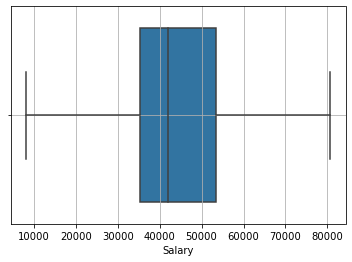

In [16]:
sns.boxplot(df['Salary'],whis=2.0)
plt.grid()
plt.show()

# Checking the spread of the data using countplot for the categorical variables and the Target varibles.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


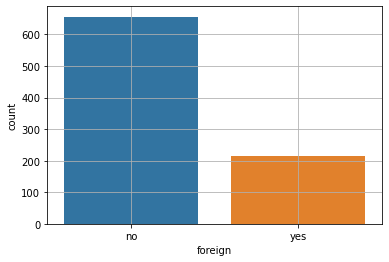

In [17]:
sns.countplot(df['foreign'])
plt.grid()
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


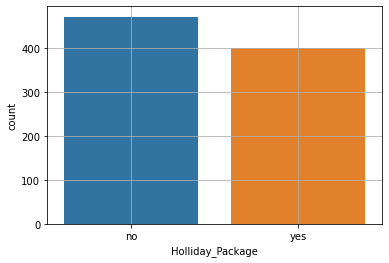

In [18]:
sns.countplot(df['Holliday_Package'])
plt.grid()
plt.show()

# Bivarate Analysis with Target Varible

# Salary against Holiday_Package

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


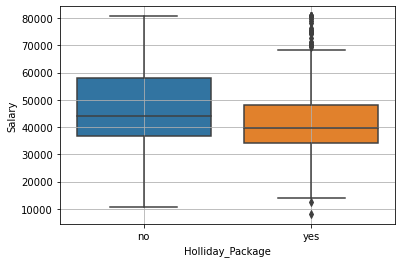

In [19]:
sns.boxplot(df['Holliday_Package'],df['Salary'])
plt.grid()
plt.show()


# age against  Holiday_Package

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


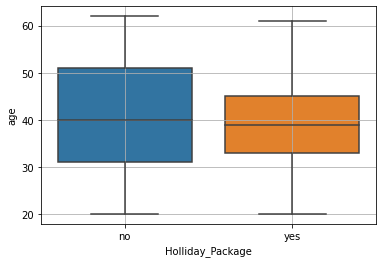

In [20]:
sns.boxplot(df['Holliday_Package'],df['age'])
plt.grid()
plt.show()

# educ against Holiday_Package

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


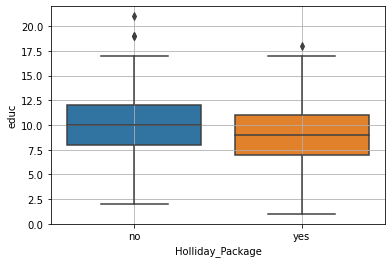

In [21]:
sns.boxplot(df['Holliday_Package'],df['educ'])
plt.grid()
plt.show()

# no_young_children Vs Holiday_Package

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


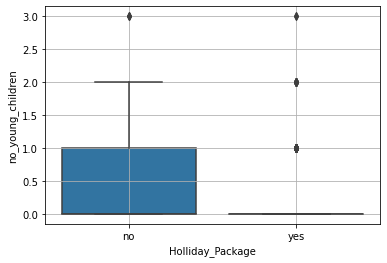

In [22]:
sns.boxplot(df['Holliday_Package'],df['no_young_children'])
plt.grid()
plt.show()

# no_older_children Vs Holiday_Package

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


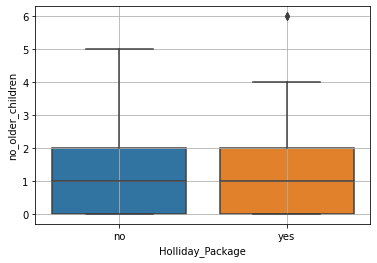

In [23]:
sns.boxplot(df['Holliday_Package'],df['no_older_children'])
plt.grid()
plt.show()

# foreign Vs Holiday_Package

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

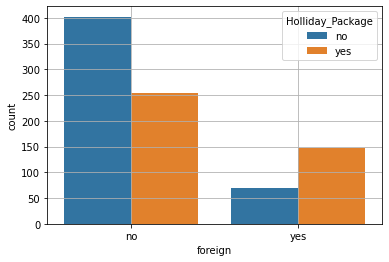

In [24]:
sns.countplot(df['foreign'],hue=df['Holliday_Package'])
plt.grid()
plt.show

# Converting the Target Variable into Categorical 

In [25]:
df['Holliday_Package'] = pd.Categorical(df['Holliday_Package']).codes

In [26]:
df['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    object 
dtypes: float64(1), int64(4), int8(1), object(1)
memory usage: 41.9+ KB


In [28]:
# Creating the dummy variables for foregin variable.

In [29]:
df1 = pd.get_dummies(df, columns=['foreign'],drop_first=True)

In [30]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


# Checking for Correlations.

In [31]:
df1.corr()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
Holliday_Package,1.000000,-0.180214,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.180214,1.000000,0.047029,0.352726,-0.034360,0.121993,-0.239387
age,-0.092311,0.047029,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.352726,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.034360,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.121993,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign_yes,0.254096,-0.239387,-0.107148,-0.419678,0.085111,0.021317,1.000000


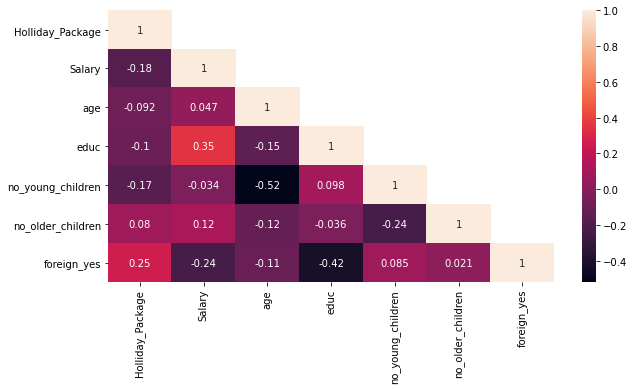

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True,mask=np.triu(df1.corr(),+1));

There is hardly any correlation btween the variables

In [33]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.307339,3.036259,1.00,8.0,9.0,12.0,21.00
no_young_children,872.0,0.311927,0.612870,0.00,0.0,0.0,0.0,3.00
no_older_children,872.0,0.982798,1.086786,0.00,0.0,1.0,2.0,6.00
foreign_yes,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


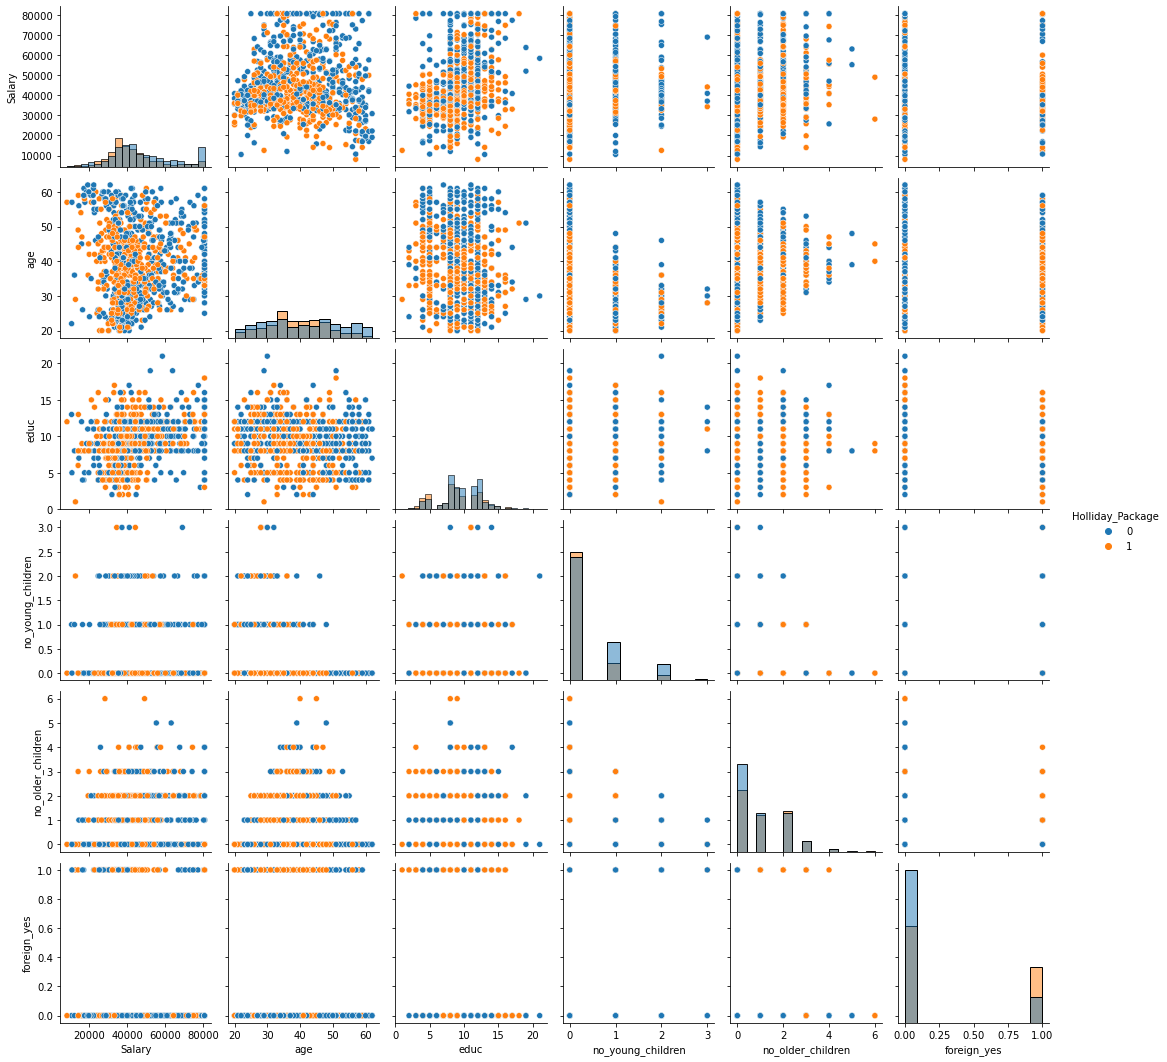

In [34]:
# Pairplot using sns
sns.pairplot(df1 ,diag_kind='hist' ,hue='Holliday_Package');

# Split the Data 

In [35]:
X= df1.drop('Holliday_Package',axis=1)
Y=df1['Holliday_Package']

In [36]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


In [37]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package, dtype: int8

# Train and Test the split data

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1,stratify=df1['Holliday_Package'])

In [39]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [40]:
Y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

# Logistic Regression Model

In [211]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

# Predicting on Training and Test dataset

In [212]:
Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

In [213]:
X_train

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1
...,...,...,...,...,...,...
594,42369.0,47,9,0,1,0
297,44207.0,45,12,0,2,0
76,50291.0,34,10,0,2,0
831,33434.0,44,7,0,1,1


In [214]:
X_test

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
264,25118.0,58,8,0,0,0
189,40913.0,20,9,1,0,0
643,28446.0,58,8,0,0,0
65,36072.0,35,4,0,2,0
241,52736.0,40,10,0,3,0
...,...,...,...,...,...,...
165,34878.0,29,14,1,1,0
100,61159.0,38,10,0,3,0
503,41167.0,44,9,0,2,0
431,41769.0,43,9,0,0,0


In [215]:
Ytrain_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [216]:
Ytest_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

# Getting the Predicted Classes and Probs

In [217]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.677845,0.322155
1,0.534493,0.465507
2,0.691845,0.308155
3,0.487745,0.512255
4,0.571939,0.428061


# Linear Discriminant Analysis

In [218]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [219]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

# Prediction with  Train and Test data

In [220]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [221]:
X_train

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1
...,...,...,...,...,...,...
594,42369.0,47,9,0,1,0
297,44207.0,45,12,0,2,0
76,50291.0,34,10,0,2,0
831,33434.0,44,7,0,1,1


In [222]:
X_test

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
264,25118.0,58,8,0,0,0
189,40913.0,20,9,1,0,0
643,28446.0,58,8,0,0,0
65,36072.0,35,4,0,2,0
241,52736.0,40,10,0,3,0
...,...,...,...,...,...,...
165,34878.0,29,14,1,1,0
100,61159.0,38,10,0,3,0
503,41167.0,44,9,0,2,0
431,41769.0,43,9,0,0,0


In [223]:
pred_class_train

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [224]:
pred_class_test

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

# Logistic Regression Model

# Model Evaluation

In [225]:
# Accuracy - Training Data
model.score(X_train, Y_train)

0.6622950819672131

# AUC and ROC for the training data

AUC: 0.731


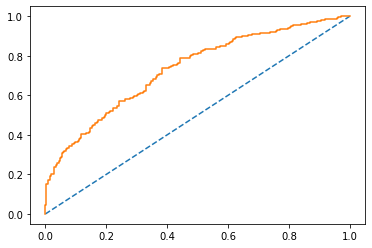

In [226]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [227]:
# Accuracy - Test Data
model.score(X_test, Y_test)

0.648854961832061

# AUC and ROC for the test data

AUC: 0.731


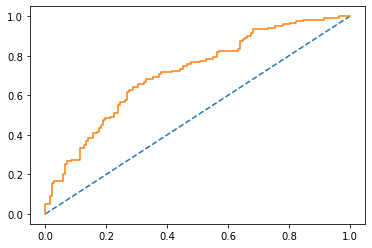

In [228]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Confusion Matrix for the training data

In [229]:
confusion_matrix(Y_train, Ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

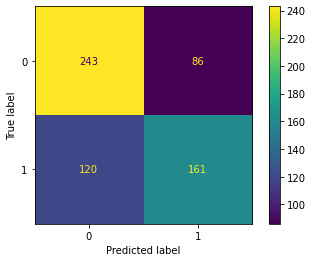

In [230]:
plot_confusion_matrix(model,X_train,Y_train);

In [231]:
print(classification_report(Y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



# Confusion Matrix for test data

In [232]:
confusion_matrix(Y_test, Ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

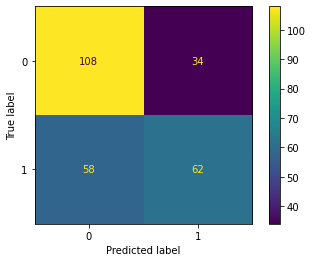

In [233]:
plot_confusion_matrix(model,X_test,Y_test);

In [234]:
print(classification_report(Y_test, Ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



# Applying GridSearchCV for Logistic Regression

In [235]:
grid={'penalty':['7','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [237]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [238]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [239]:
grid_search.fit(X_train, Y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan  0.  0.  0.  0.]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['7', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [240]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [241]:
best_model = grid_search.best_estimator_

In [242]:
# Prediction on the training set

Ytrain_predict = best_model.predict(X_train)
Ytest_predict = best_model.predict(X_test)

In [243]:
## Getting the probabilities on the test set

Ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.525616,0.474384
1,0.555497,0.444503
2,0.530489,0.469511
3,0.546021,0.453979
4,0.568725,0.431275


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


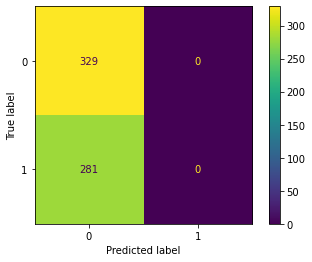

In [244]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,Y_train)
print(classification_report(Y_train, Ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


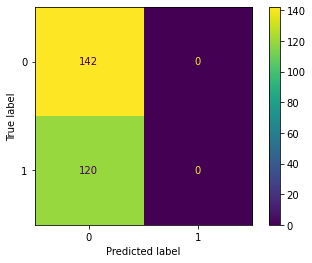

In [245]:
# Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,Y_test)
print(classification_report(Y_test, Ytest_predict),'\n');

 Here after apply grid search Cv the model is overfitted so we go  without the  trunning parameters 

# Linear Discriminant Analysis

# Model Evaluation 

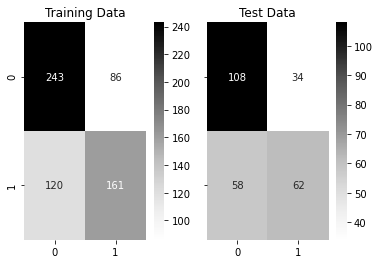

In [146]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Training Data and Test Data Classification Report Comparison

In [147]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



# Probability prediction for the training and test data

In [148]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [149]:
pred_prob_train[:,1]

array([0.73381047, 0.28335139, 0.39602227, 0.75811139, 0.47077503,
       0.40288832, 0.36938597, 0.30429271, 0.60511549, 0.64331779,
       0.23236876, 0.25905352, 0.35870658, 0.04481746, 0.28052157,
       0.36436459, 0.54805152, 0.30607846, 0.58596151, 0.66087477,
       0.62864901, 0.26524013, 0.88183311, 0.3339946 , 0.08650304,
       0.82610447, 0.19401889, 0.75721542, 0.53138081, 0.1884556 ,
       0.29545808, 0.33809258, 0.3786442 , 0.3805076 , 0.31248766,
       0.29335095, 0.10970912, 0.56057784, 0.48145587, 0.19510252,
       0.22664102, 0.79936112, 0.5017598 , 0.73936151, 0.7906696 ,
       0.36957611, 0.30401273, 0.93317999, 0.43207603, 0.72243241,
       0.71571829, 0.45361505, 0.78697249, 0.3732299 , 0.19256563,
       0.74061067, 0.25056989, 0.51469343, 0.67344556, 0.35368416,
       0.61007438, 0.52767641, 0.52194835, 0.41031873, 0.56904209,
       0.61659997, 0.1237378 , 0.56414678, 0.40272604, 0.27648254,
       0.33165029, 0.74716143, 0.77838017, 0.21902504, 0.44569

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


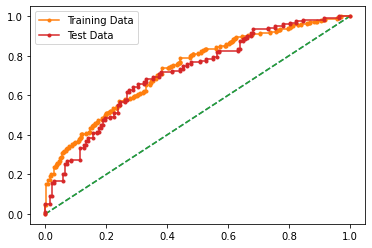

In [150]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


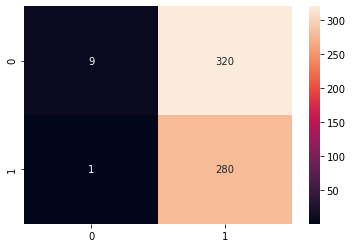

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


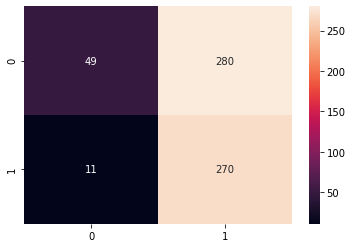

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


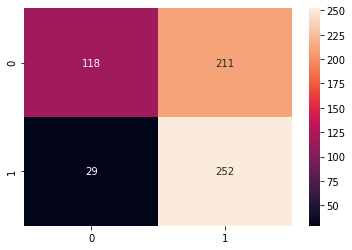

0.4 

Accuracy Score 0.6623
F1 Score 0.6677 

Confusion Matrix


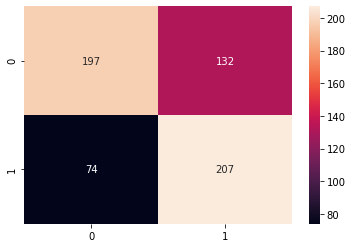

0.5 

Accuracy Score 0.6623
F1 Score 0.6098 

Confusion Matrix


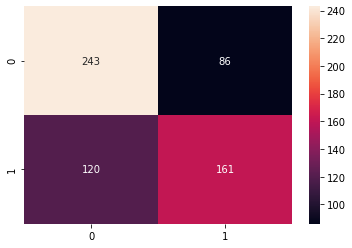

0.6 

Accuracy Score 0.6508
F1 Score 0.5192 

Confusion Matrix


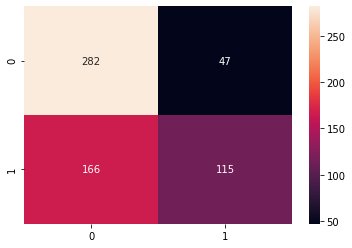

0.7 

Accuracy Score 0.6426
F1 Score 0.4263 

Confusion Matrix


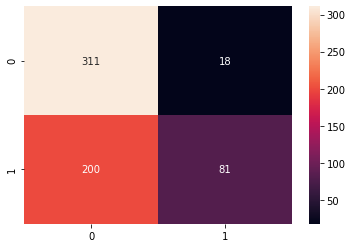

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


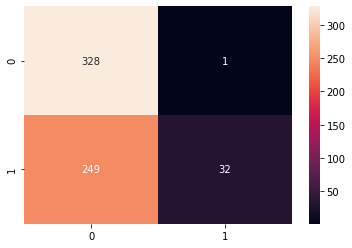

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


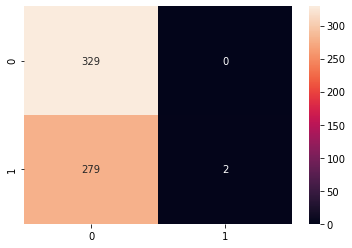

In [162]:
for j in np.arange(0.1,1,0.1):
    Holidaypackage_prob = j #defining the cut-off value of our choice
    Holidaypackage_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > Holidaypackage_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        Holidaypackage_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,Holidaypackage_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,Holidaypackage_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,Holidaypackage_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [163]:
#Predicting the classes on the test data

data_pred_Holidaypackage_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_Holidaypackage_cutoff.append(a)

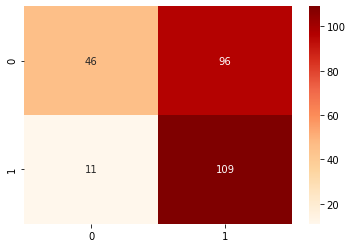

In [164]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_Holidaypackage_cutoff)),annot=True,fmt='.5g',cmap='OrRd');

In [168]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the Holidaypackage cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_Holidaypackage_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



Classification Report of the Holidaypackage cut-off test data:

               precision    recall  f1-score   support

           0       0.81      0.32      0.46       142
           1       0.53      0.91      0.67       120

    accuracy                           0.59       262
   macro avg       0.67      0.62      0.57       262
weighted avg       0.68      0.59      0.56       262
 



# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

 In Logistic Regression Model we use the model without any turning parameters, while in LDA we will use model with turning parameters.
 
In  Logistic Regression Model

For  Opting Holiday Package [Label:1]

Precision (65%) - 65% of employees that are predicted are actually opting Holiday Package  out of all the employees who are predicted to opted Holiday Package.

Recall (52%) – Out of all employee who are opting the holiday package 52% of employees are predicted correctly.

F1 score( 57%) – 57% data is between precision and recall

Overall accuracy of the model – 65 % of total predictions are correct.
